# California house price prediction

The problem that we are going to solve here is that given a set of features that describe a house in California, our machine learning model must predict the house price. To train our machine learning model with California housing data, we will be using scikit-learn‚Äôs fetch_california_housing dataset.

In this dataset, each row describes a california town or suburb. There are 20640 rows and 8 attributes (features) with a target column (price).
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(california.data)

In [4]:
# See head of the dataset
data.head()

0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25

In [5]:
#Adding the feature names to the dataframe
data.columns = california.feature_names
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

MedInc median income in block group <br>
HouseAge median house age in block group <br>
AveRooms average number of rooms per household <br>
AveBedrms average number of bedrooms per household <br>
Population block group population <br>
AveOccup average number of household members <br>
Latitude block group latitude <br>
Longitude block group longitude <br>

Each record in the database describes a Caliornia suburb or town.

In [6]:
#Adding target variable to dataframe
data['PRICE'] = california.target 
# Median value of owner-occupied homes in $1000s

In [7]:
#Check the shape of dataframe
data.shape

(20640, 9)

In [8]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [9]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

In [10]:
# Identifying the unique number of values in the dataset
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

In [11]:
# Check for missing values
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [12]:
# See rows with missing values
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, PRICE]
Index: []

In [13]:
# Viewing the data statistics
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [14]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(9, 9)

<AxesSubplot:>

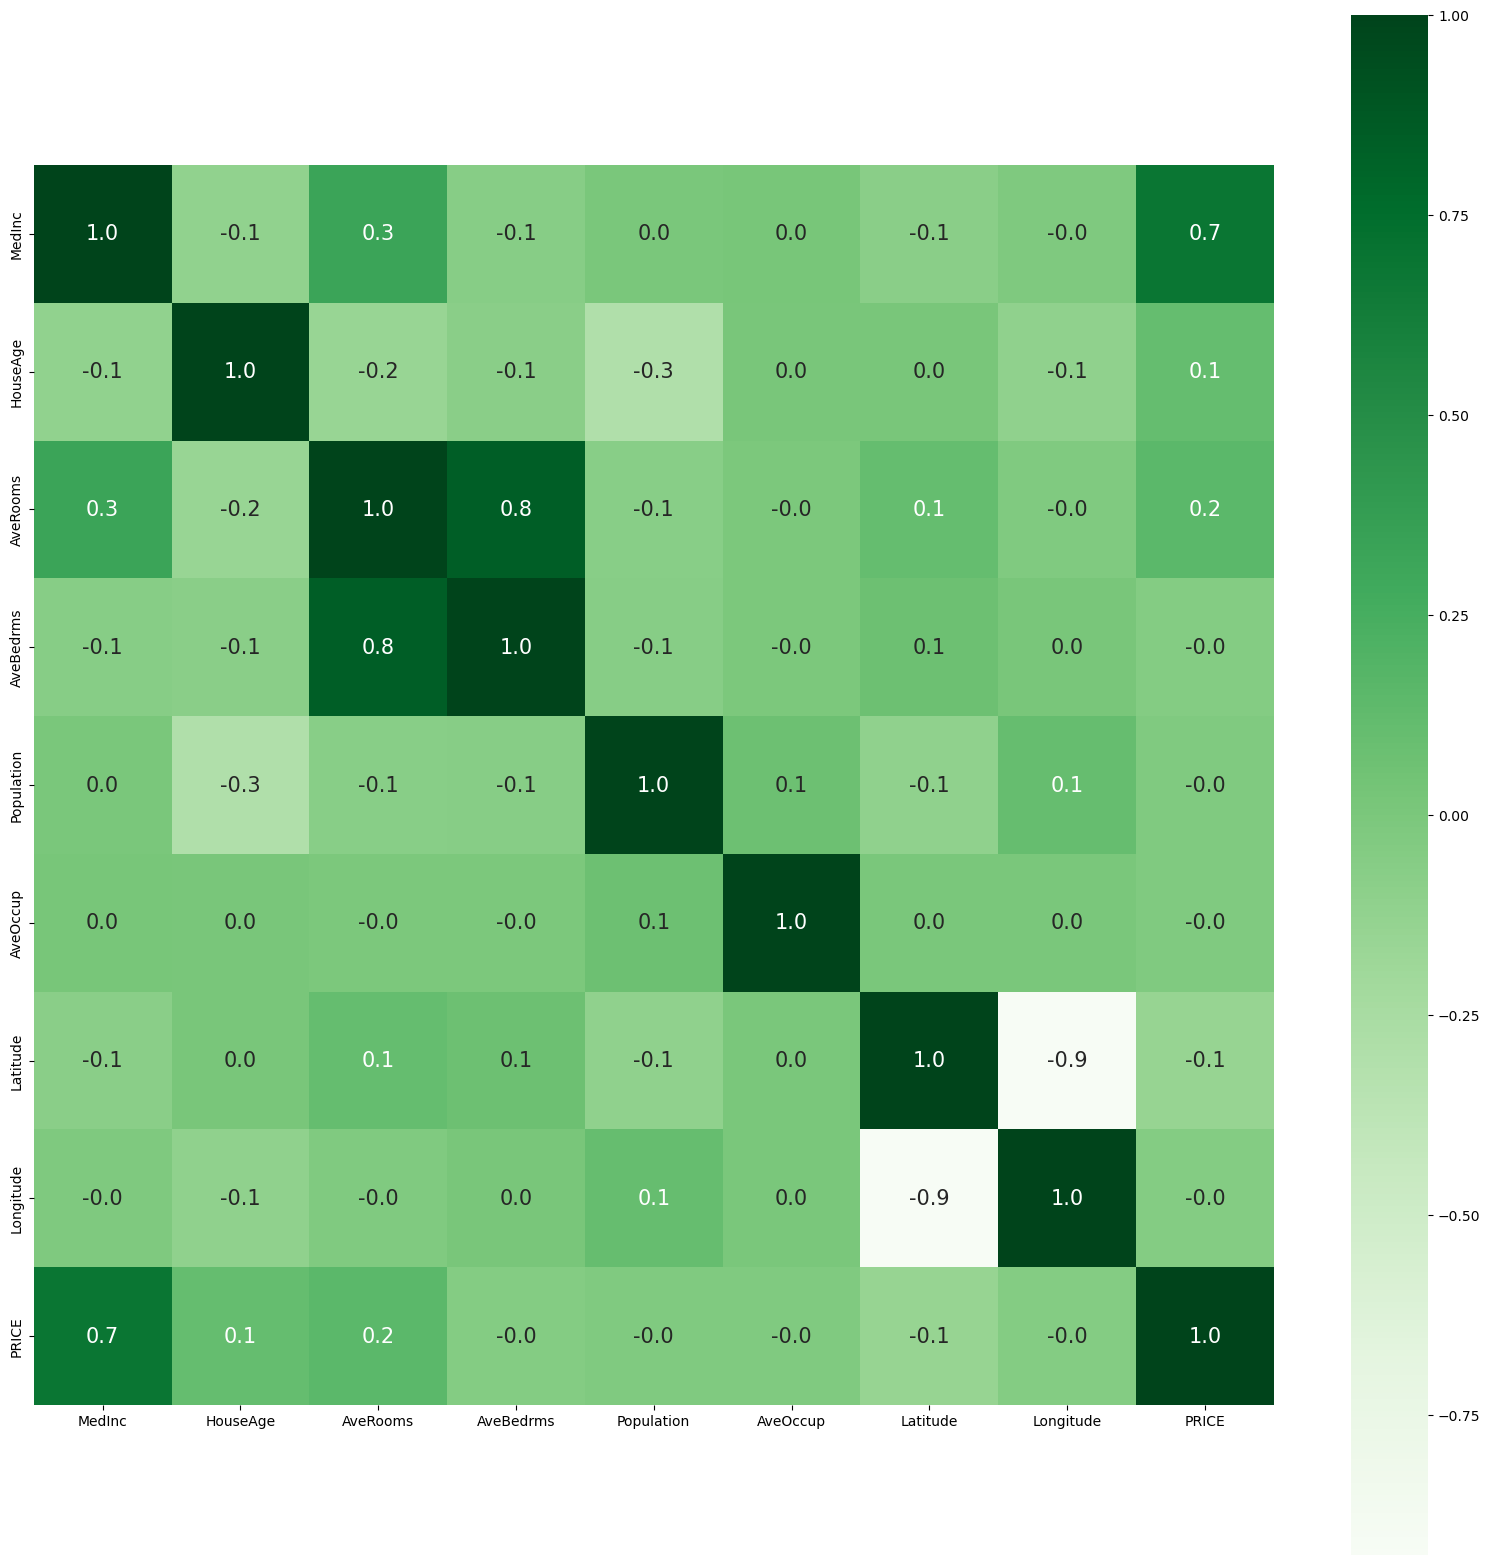

In [15]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [16]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [17]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Linear regression

#### Training the model

In [18]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
# Value of y intercept
lm.intercept_

-36.9258842988459

In [20]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0      MedInc     0.438284
1    HouseAge     0.009021
2    AveRooms    -0.113436
3   AveBedrms     0.648835
4  Population    -0.000008
5    AveOccup    -0.003978
6    Latitude    -0.421168
7   Longitude     -0.43468

#### Model Evaluation

In [21]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [22]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6081901093734017
Adjusted R^2: 0.6079730251483852
MAE: 0.5319076620403791
MSE: 0.5258454910434389
RMSE: 0.7251520468449627


ùëÖ^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted ùëÖ^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.¬†

MSE: The¬†mean square error¬†(MSE) is just like the MAE, but¬†squares¬†the difference before summing them all instead of using the absolute value.¬†

RMSE: The¬†mean square error¬†(MSE) is just like the MAE, but¬†squares¬†the difference before summing them all instead of using the absolute value.¬†






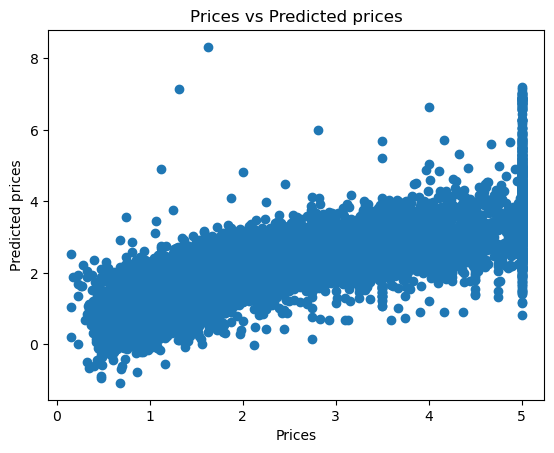

In [23]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

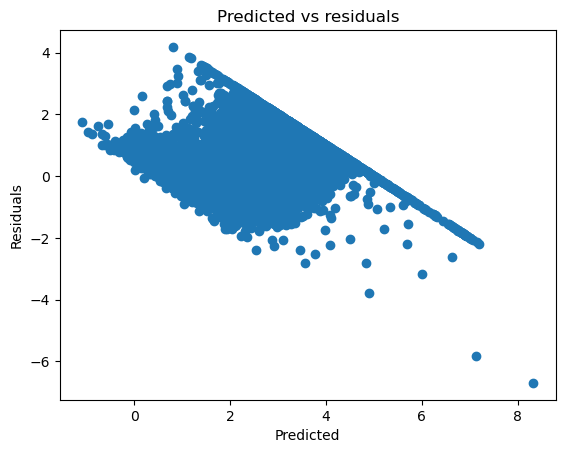

In [24]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

C:\Users\sahaj\anaconda3\envs\New\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


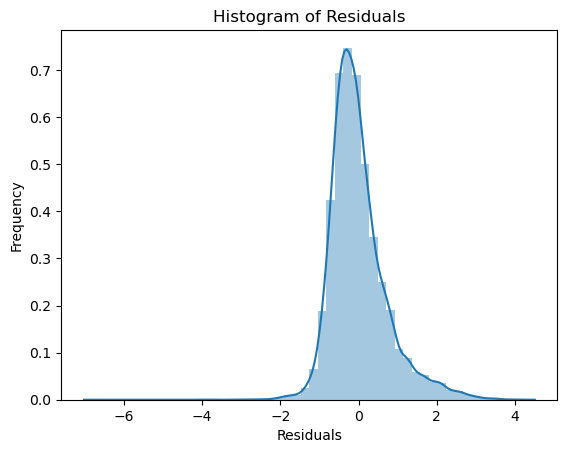

In [25]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#### For test data

In [26]:
# Predicting Test data with the model
y_test_pred_LR = lm.predict(X_test)

In [27]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred_LR)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_LR))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_LR))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_LR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_LR)))

R^2: 0.6010291338754374
Adjusted R^2: 0.6005129173253814
MAE: 0.5303872778945684
MSE: 0.5213468821374595
RMSE: 0.7220435458734186


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

# Random Forest Regressor 

#### Train the model

In [28]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Train the model using the training sets 
rf.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [29]:
# Model prediction on train data
y_pred = rf.predict(X_train)

In [30]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9729980945501195
Adjusted R^2: 0.9729831340096666
MAE: 0.12313095143272464
MSE: 0.036239080661525744
RMSE: 0.19036564989914997


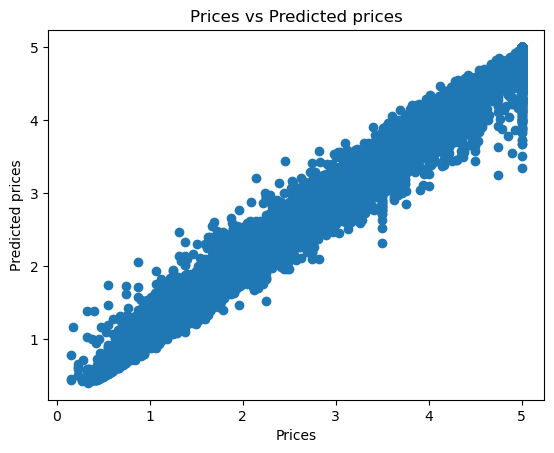

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

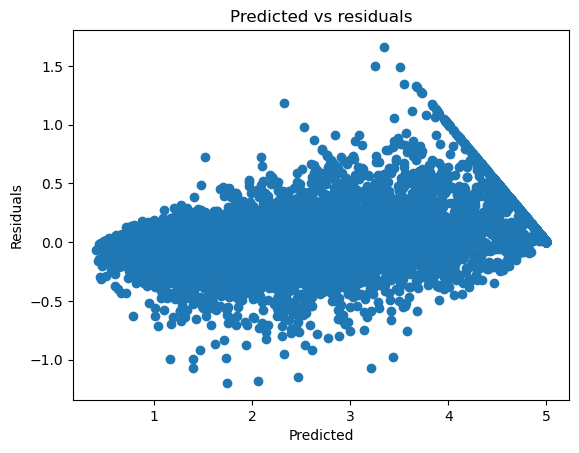

In [32]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [33]:
# Predicting Test data with the model
y_test_pred_RF = rf.predict(X_test)

In [34]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred_RF)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_RF))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_RF))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_RF))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_RF)))

R^2: 0.7997860957294424
Adjusted R^2: 0.7995270449071612
MAE: 0.33442038737080115
MSE: 0.2616253556705423
RMSE: 0.511493260630619


# XGBoost Regressor

#### Training the model

In [35]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xg = XGBRegressor()

# Train the model using the training sets 
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

max_depth (int) ‚Äì Maximum tree depth for base learners.

learning_rate (float) ‚Äì Boosting learning rate (xgb‚Äôs ‚Äúeta‚Äù)

n_estimators (int) ‚Äì Number of boosted trees to fit.

gamma (float) ‚Äì Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) ‚Äì Minimum sum of instance weight(hessian) needed in a child.

subsample (float) ‚Äì Subsample ratio of the training instance.

colsample_bytree (float) ‚Äì Subsample ratio of columns when constructing each tree.

objective (string or callable) ‚Äì Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) ‚Äì Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) ‚Äì Balancing of positive and negative weights.


### Model Evaluation

In [36]:
# Model prediction on train data
y_pred = xg.predict(X_train)

In [37]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9467753349431811
Adjusted R^2: 0.9467458455519175
MAE: 0.18818589321214796
MSE: 0.0714324747843043
RMSE: 0.26726854432256764


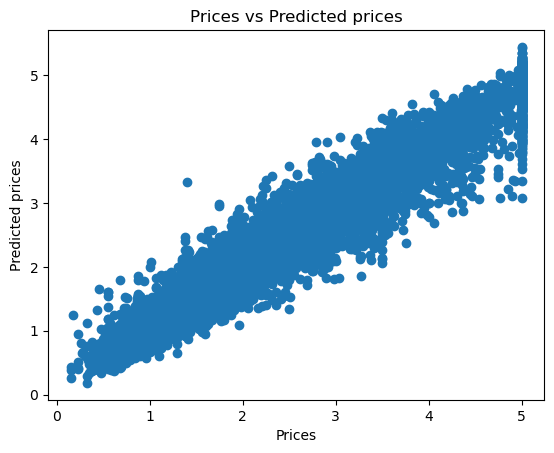

In [38]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

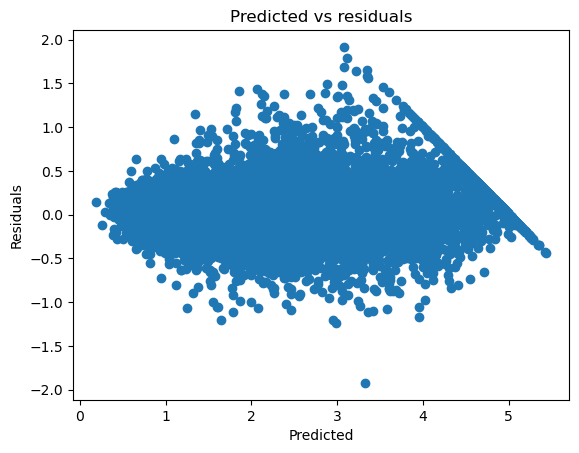

In [39]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [40]:
#Predicting Test data with the model
y_test_pred_XG = xg.predict(X_test)

In [41]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_XG)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_XG))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_XG))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_XG))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_XG)))

R^2: 0.8331080832284813
Adjusted R^2: 0.8328921467358124
MAE: 0.30944652988864313
MSE: 0.21808254148464745
RMSE: 0.46699308505014014


# SVM Regressor

In [42]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [43]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svm = svm.SVR()

In [44]:
# Train the model using the training sets 
svm.fit(X_train, y_train)

SVR()

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf‚Äô): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed‚Äô or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‚Äòpoly‚Äô). Ignored by all other kernels.

gamma : float, optional (default='auto‚Äô): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

#### Model Evaluation

In [46]:
# Model prediction on train data
y_pred = svm.predict(X_train)

In [47]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7478602270878776
Adjusted R^2: 0.7477205277885288
MAE: 0.3847450385143313
MSE: 0.33839513976157776
RMSE: 0.5817174054139843


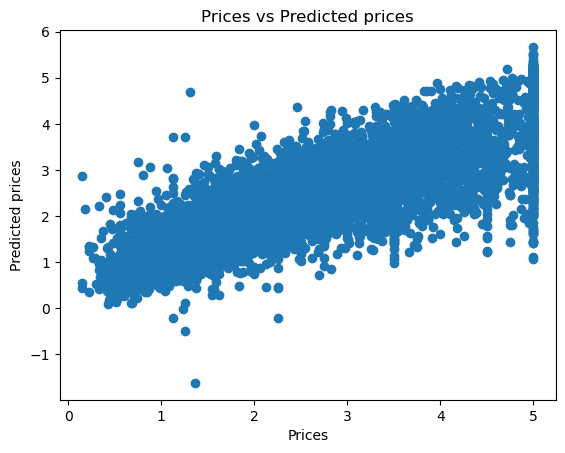

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

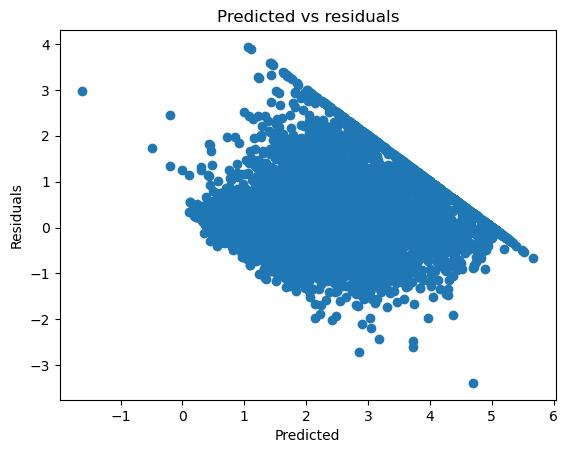

In [49]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [50]:
# Predicting Test data with the model
y_test_pred_SV = svm.predict(X_test)

In [51]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred_SV)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_SV))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_SV))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_SV))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_SV)))

R^2: 0.7263792917547527
Adjusted R^2: 0.7260252620497613
MAE: 0.398389131637503
MSE: 0.357548170164801
RMSE: 0.5979533177136832


# Evaluation and comparision of all the models

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

Model  R-squared Score
2                  XGBoost        83.310808
1            Random Forest        79.978610
3  Support Vector Machines        72.637929
0        Linear Regression        60.102913

## Hence XGBoost Regression works the best for this dataset.

## Aggregating the Results of the Four Models

In [53]:
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [54]:
n_data = {
    'Linear Regression': [],
    'Random Forest': [],
    'XGBoost': [],
    'SVM': [],
    'y_true': []
}

In [55]:
x = data.drop('PRICE',axis=1)

In [56]:
lin_pred = lm.predict(np.array(x))
sv_pred = svm.predict(np.array(x))
xg_pred = xg.predict(np.array(x))
rf_pred = rf.predict(np.array(x))

C:\Users\sahaj\anaconda3\envs\New\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\sahaj\anaconda3\envs\New\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
lin_pred

array([4.12923097, 3.9785459 , 3.65936151, ..., 0.17683048, 0.32509552,
       0.5211656 ])

In [58]:
n_data['Linear Regression'] = lin_pred
n_data['Random Forest'] = rf_pred
n_data['SVM'] = sv_pred
n_data['XGBoost'] = xg_pred
n_data['y_true'] = np.array(data['PRICE'])

In [59]:
n_data

{'Linear Regression': array([4.12923097, 3.9785459 , 3.65936151, ..., 0.17683048, 0.32509552,
        0.5211656 ]),
 'Random Forest': array([4.3092928, 3.860151 , 3.7861313, ..., 0.92744  , 0.98834  ,
        0.93281  ]),
 'XGBoost': array([4.1796966 , 3.796542  , 4.096528  , ..., 0.92656034, 1.1689541 ,
        0.94739187], dtype=float32),
 'SVM': array([2.34566992, 2.34566992, 2.34566992, ..., 2.34566992, 2.34566992,
        2.34566992]),
 'y_true': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])}

In [60]:
import pandas as pd

df = pd.DataFrame(n_data)
print(df.head())

   Linear Regression  Random Forest   XGBoost      SVM  y_true
0           4.129231       4.309293  4.179697  2.34567   4.526
1           3.978546       3.860151  3.796542  2.34567   3.585
2           3.659362       3.786131  4.096528  2.34567   3.521
3           3.236729       3.529570  3.397922  2.34567   3.413
4           2.403091       3.045710  3.161297  2.34567   3.422


In [61]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
model.add(tf.keras.Input(shape=(4)))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(n_data.drop('PRICE',axis=1), n_data['PRICE'], test_size = 0.3)

In [ ]:
# model.fit(X_train, y_train, batch_size= 50, epochs=100,validation_data=(X_test,y_test))

In [64]:
df1 = df.iloc[:, [0, 1, 2, 3]]
df1.head()

Linear Regression  Random Forest   XGBoost      SVM
0           4.129231       4.309293  4.179697  2.34567
1           3.978546       3.860151  3.796542  2.34567
2           3.659362       3.786131  4.096528  2.34567
3           3.236729       3.529570  3.397922  2.34567
4           2.403091       3.045710  3.161297  2.34567

ERROR! Session/line number was not unique in database. History logging moved to new session 131


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['y_true'], test_size = 0.3)

In [66]:
history = model.fit(X_train, y_train, batch_size= 50, epochs=100,validation_data=(X_test,y_test))

Train on 14448 samples, validate on 6192 samples
Epoch 1/100
14448/14448 [==============================] - 1s 87us/sample - loss: 0.3076 - val_loss: 0.1432
Epoch 2/100
14448/14448 [==============================] - 1s 49us/sample - loss: 0.1310 - val_loss: 0.1209
Epoch 3/100
14448/14448 [==============================] - 1s 55us/sample - loss: 0.1186 - val_loss: 0.1124
Epoch 4/100
14448/14448 [==============================] - 1s 54us/sample - loss: 0.1121 - val_loss: 0.1056
Epoch 5/100
14448/14448 [==============================] - 1s 55us/sample - loss: 0.1063 - val_loss: 0.1003
Epoch 6/100
14448/14448 [==============================] - 1s 55us/sample - loss: 0.1013 - val_loss: 0.0952
Epoch 7/100
14448/14448 [==============================] - 1s 58us/sample - loss: 0.0976 - val_loss: 0.0919
Epoch 8/100
14448/14448 [==============================] - 1s 50us/sample - loss: 0.0952 - val_loss: 0.0902
Epoch 9/100
14448/14448 [==============================] - 1s 54us/sample - loss: 0.094

Epoch 76/100
14448/14448 [==============================] - 1s 42us/sample - loss: 0.0933 - val_loss: 0.0884
Epoch 77/100
14448/14448 [==============================] - 1s 51us/sample - loss: 0.0931 - val_loss: 0.0897
Epoch 78/100
14448/14448 [==============================] - 1s 55us/sample - loss: 0.0933 - val_loss: 0.0885
Epoch 79/100
14448/14448 [==============================] - 1s 64us/sample - loss: 0.0932 - val_loss: 0.0885
Epoch 80/100
14448/14448 [==============================] - 1s 65us/sample - loss: 0.0929 - val_loss: 0.0889
Epoch 81/100
14448/14448 [==============================] - 1s 62us/sample - loss: 0.0932 - val_loss: 0.0885
Epoch 82/100
14448/14448 [==============================] - 1s 65us/sample - loss: 0.0931 - val_loss: 0.0895
Epoch 83/100
14448/14448 [==============================] - 1s 54us/sample - loss: 0.0931 - val_loss: 0.0885
Epoch 84/100
14448/14448 [==============================] - 1s 54us/sample - loss: 0.0932 - val_loss: 0.0884
Epoch 85/100
14448/

dict_keys(['loss', 'val_loss'])


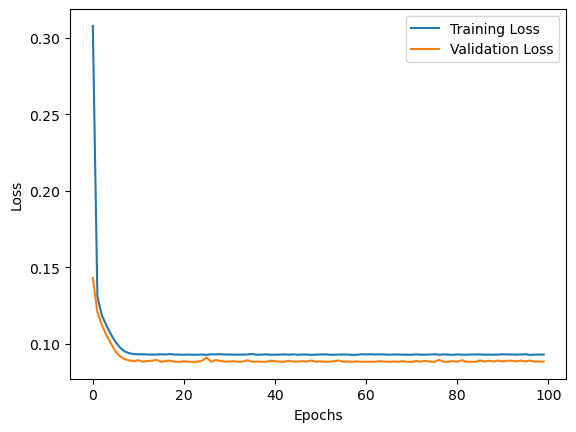

In [67]:
# Viewing results
print(history.history.keys())  # Display available metrics

# Plotting training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()